Er zijn voor deze opdracht 'geen' libraries gebruikt. Alle gebruikte methoden zijn zelf uitgewerkt. De enige gebruikte libraries:

- CSV voor het verwerken van data uit CSV bestand
- math voor het berekenen van square root
- matplotlib voor het plotten van de grafieken
- (sorted voor het sorteren van een lijst met getallen)

In [24]:
from csv import *
from math import *
import matplotlib.pyplot as plt

__Alle gebruikte definities / methoden:__

In [25]:
def get_data(file):
    final, data = {}, []
    for i, row in enumerate(file):
        if 'JJ00' in str(row):
            continue
        for j, col in enumerate(row):
            if i == 0:
                data.append([])
                final[col] = j
            else:
                if is_int(col):
                    data[j].append(int(col))
                else:
                    data[j].append(col)
    for i in final: # attach each column name to list
        final[i] = data[final[i]]
    return final

def is_int(n):
    try:
        int(n)
        return True
    except:
        return False
    
def mean(l):
    return sum(l) / len(l)

def median(l):
    l = sorted(l)
    if len(l) % 2 == 0:
        return (l[len(l) // 2] + l[len(l) // 2 + 1]) / 2
    else:
        return l[len(l) // 2]
    
def mode(l):
    counted = {}
    mode = 0
    for i in l:
        if not i in counted:
            counted[i] = 1
        else:
            counted[i] += 1
        if counted[i] > mode:
            mode = counted[i]
    return mode

def std(l):
    mean_l = mean(l)
    means = []
    for i in l:
        means.append((i - mean_l)*(i - mean_l))
    return sqrt(mean(means))

def mlt(x, y):
    for i in range(len(x)):
        x[i] *= y[i]
    return x

# thanks to https://pythonprogramming.net/how-to-program-best-fit-line-machine-learning-tutorial/
def trendline(x, y):
    m = (((mean(x) * mean(y)) - mean(mlt(x, y))) / ((mean(x) * mean(x)) - mean(mlt(x, y))))
    b = mean(y) - m * mean(x)
    
    trendline = []
    for i in x:
        trendline.append((m*i)+b)
        
    return trendline

__Openen bestand en opslaan data:__

In [26]:
file = reader(open("utrecht.csv"), delimiter=';')
data = get_data(file)

__Berekeningen en plotten grafieken:__ <br>
Vertrek naar een andere gemeente afgelopen 2 jaar:

Gemiddelde:  1813.7083333333333
Mediaan:  1813.0
Modus:  1
Standaard deviatie:  235.99884872012032


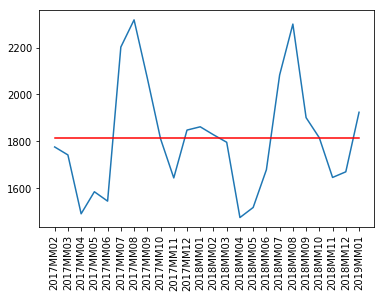

In [27]:
start, end = -25, -1
x = [1] * len(data['Perioden'][start:end])
y = data['VertrekNaarAndereGemeente_8'][start:end]
print("Gemiddelde: ",mean(y))
print("Mediaan: ", median(y))
print("Modus: ", mode(y))
print("Standaard deviatie: ", std(y))
plt.plot(data['Perioden'][start:end], y)
plt.xticks(rotation=90)
plt.plot(trendline(x,y), 'r')
plt.show()

Vestiging vanuit een andere gemeente afgelopen 2 jaar:

Gemiddelde:  1809.5
Mediaan:  1822.5
Modus:  1
Standaard deviatie:  263.8242786401585


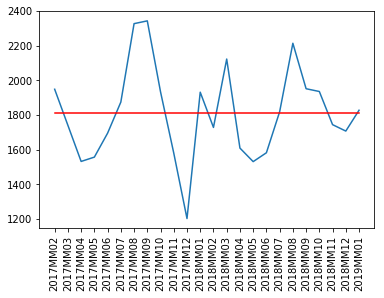

In [28]:
start, end = -25, -1
x = [1] * len(data['Perioden'][start:end])
y = data['VestigingVanuitEenAndereGemeente_5'][start:end]
print("Gemiddelde: ",mean(y))
print("Mediaan: ", median(y))
print("Modus: ", mode(y))
print("Standaard deviatie: ", std(y))
plt.plot(data['Perioden'][start:end], y)
plt.plot(trendline(x,y), 'r')
plt.xticks(rotation=90)
plt.show()

Bevolkingsgroei afgelopen 2 jaar:

Gemiddelde:  415.2083333333333
Mediaan:  317.5
Modus:  1
Standaard deviatie:  484.2833174880405


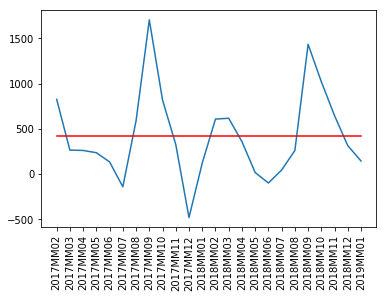

In [29]:
start, end = -25, -1
x = [1] * len(data['Perioden'][start:end])
y = data['Bevolkingsgroei_11'][start:end]
print("Gemiddelde: ",mean(y))
print("Mediaan: ", median(y))
print("Modus: ", mode(y))
print("Standaard deviatie: ", std(y))
plt.plot(data['Perioden'][start:end], y)
plt.plot(trendline(x,y), 'r')
plt.xticks(rotation=90)
plt.show()